In [ ]:
!nvidia-smi

Fri Jan 24 11:37:39 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.25M/6.25M [00:00<00:00, 237MB/s]
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 83.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 55.1ms
Speed: 13.0ms preprocess, 55.1ms inference, 805.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [ ]:
%cd /content/drive/MyDrive/crackdataset

/content/drive/MyDrive/crackdataset


In [ ]:
!ls

data  data.yaml


In [ ]:
%cd /content/drive/MyDrive/crackdataset

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=10 imgsz=720 plots=True

/content/drive/MyDrive/crackdataset
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
%cd /content/drive/MyDrive/crackdataset

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=416 plots=True

/content/drive/MyDrive/crackdataset
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
%cd /content/drive/MyDrive/crackdataset

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=416 plots=True

/content/drive/MyDrive/crackdataset
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=416 plots=True

/content/drive/MyDrive/yolov8
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [ ]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=80 imgsz=416 plots=True

/content/drive/MyDrive/yolov8
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [ ]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=416 plots=True

/content/drive/MyDrive/yolov8
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [ ]:
!ls runs/detect/train5/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1737713140.bf313a2dffb8.1579.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2700.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2701.jpg  weights
P_curve.png					    train_batch2702.jpg
PR_curve.png					    train_batch2.jpg


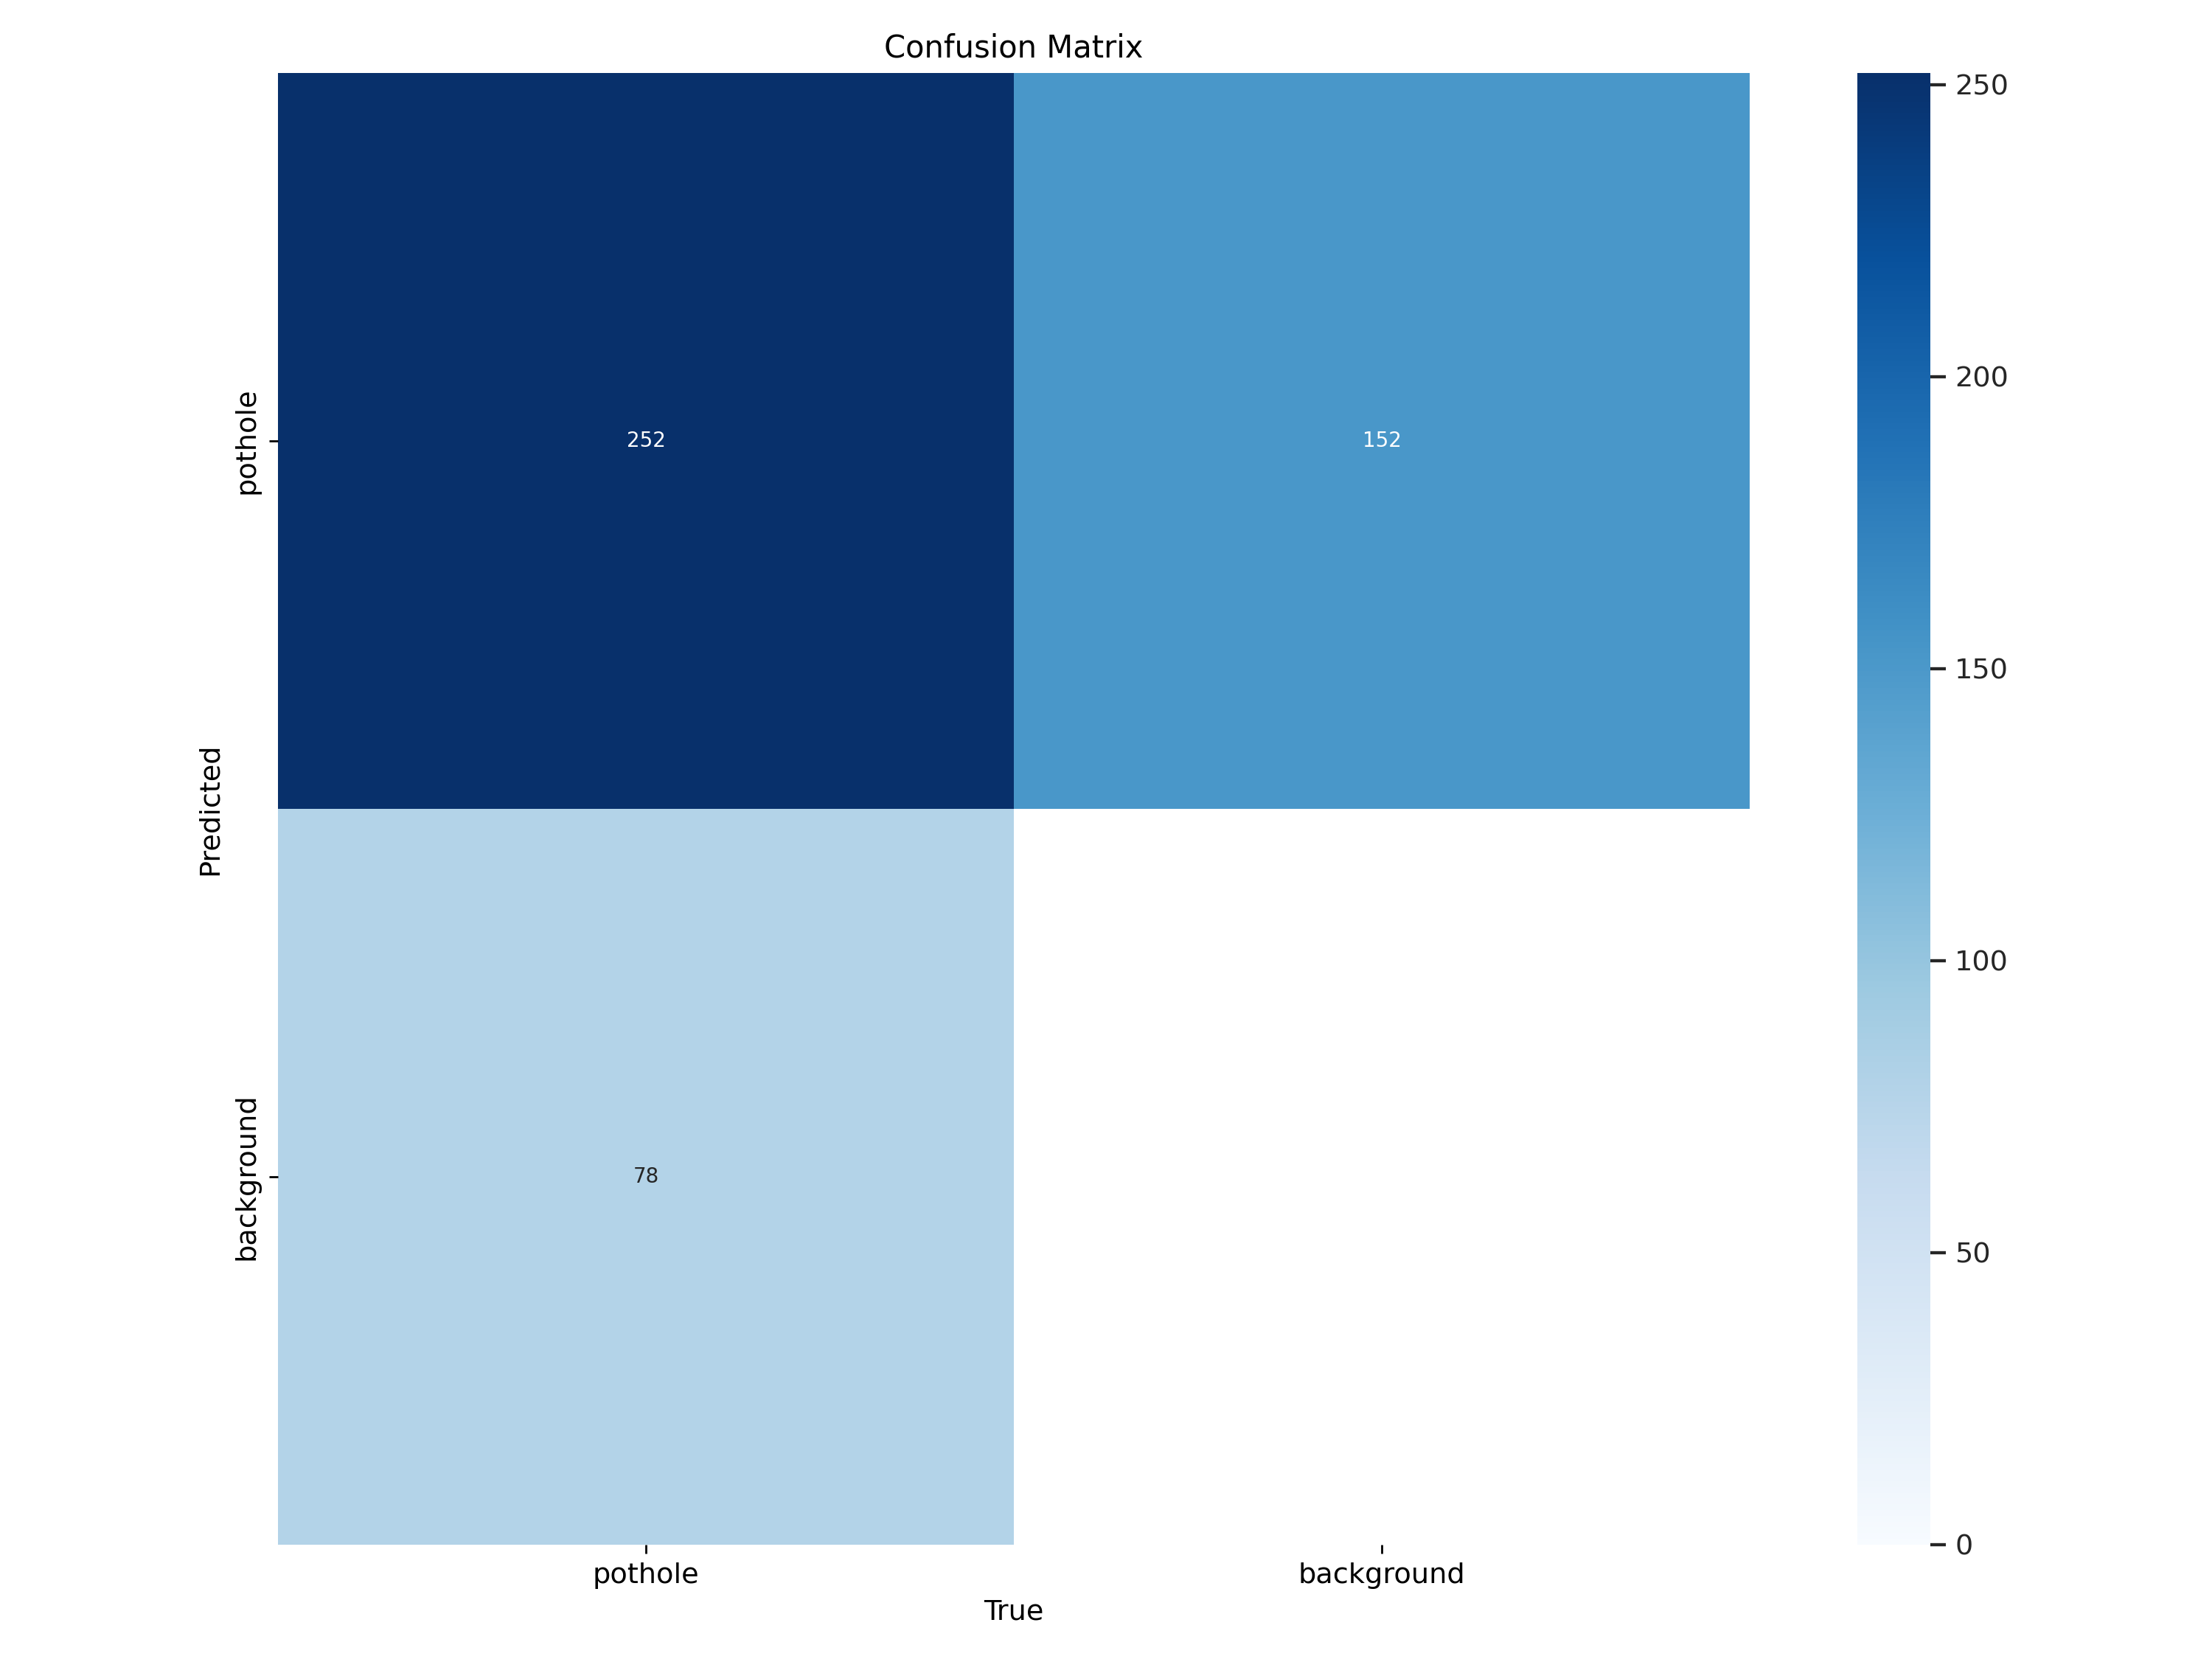

In [ ]:
Image(filename='runs/detect/train5/confusion_matrix.png', width=600)

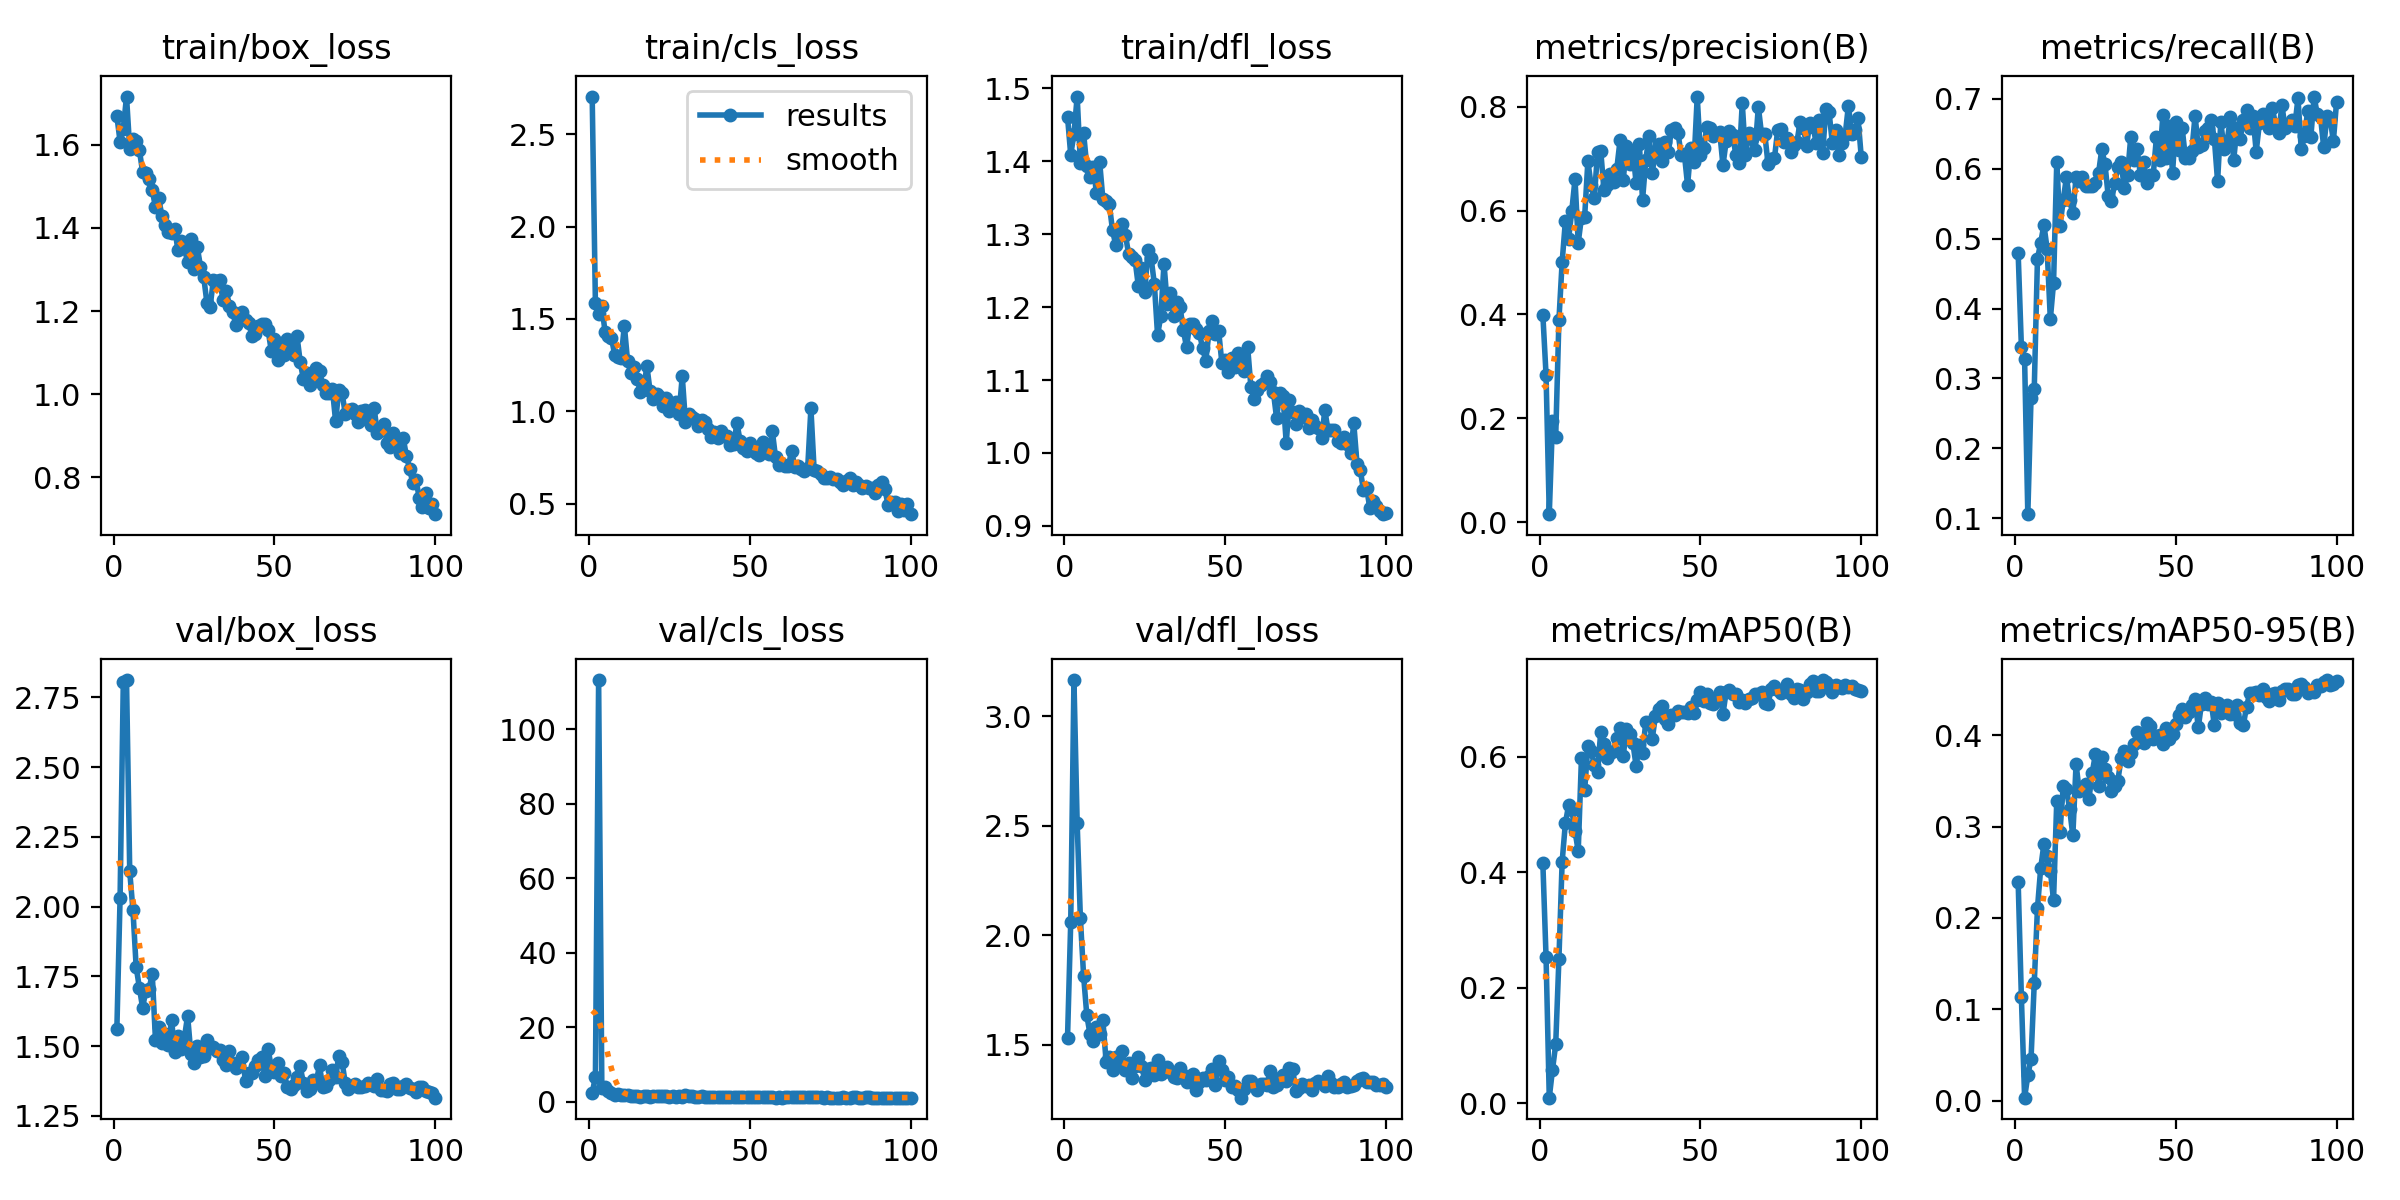

In [ ]:
Image(filename='runs/detect/train5/results.png', width=600)

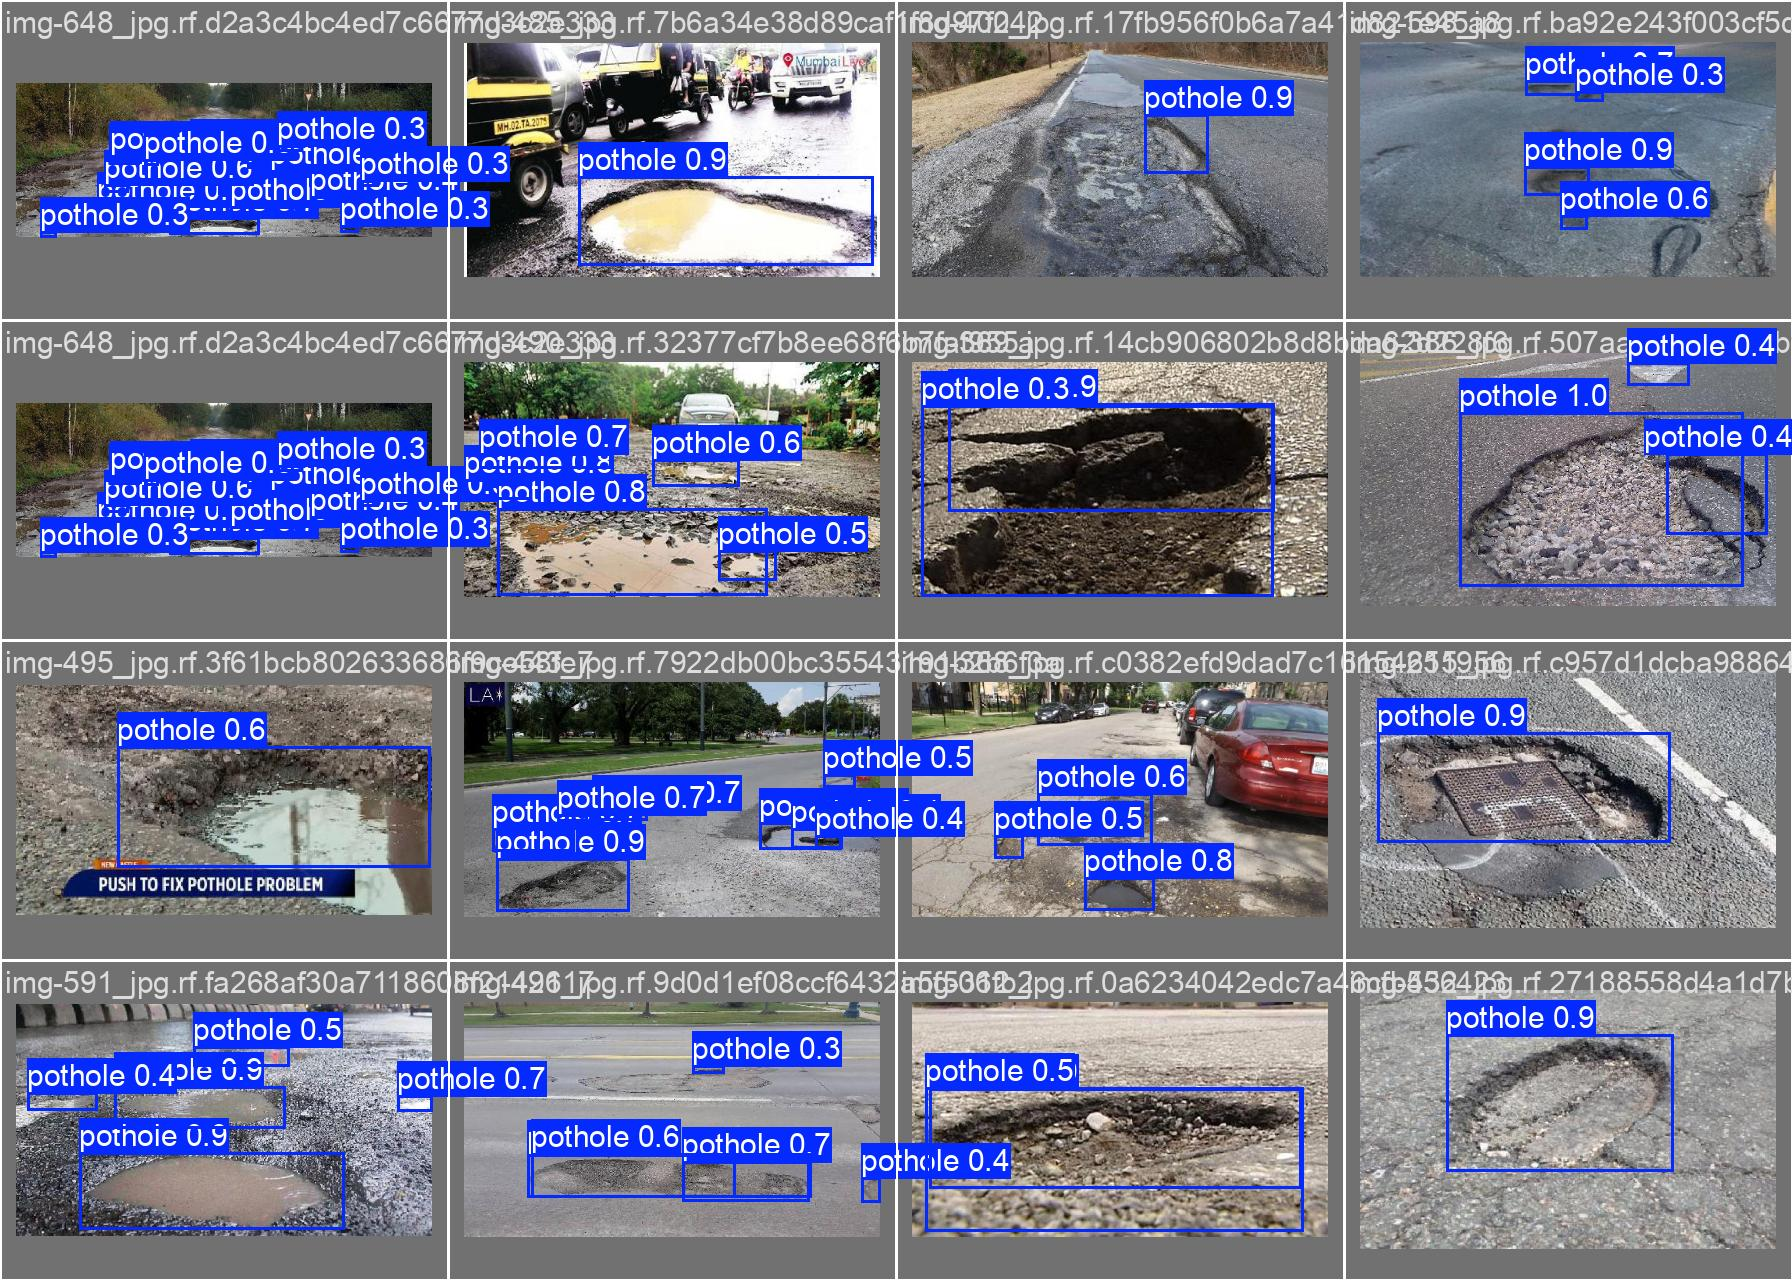

In [ ]:
Image(filename='runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train4/weights/best.pt data=data.yaml

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/crackdataset/data/valid/labels.cache... 386 images, 1 backgrounds, 0 corrupt: 100% 386/386 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:06<00:00,  3.66it/s]
                   all        386        921      0.853      0.676      0.741      0.584
                 Crack        245        615      0.753      0.418      0.499      0.322
               pothole        140        306      0.952      0.935      0.984      0.846
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source=data/test/images

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/195 /content/drive/MyDrive/crackdataset/data/test/images/20160222_081011_jpg.rf.2eba27a13088dacf2ca4e96786412618.jpg: 416x416 2 Cracks, 10.2ms
image 2/195 /content/drive/MyDrive/crackdataset/data/test/images/20160222_081102_jpg.rf.fd3bb17b19cd719c4c687a5f4e1e6201.jpg: 416x416 4 Cracks, 38.8ms
image 3/195 /content/drive/MyDrive/crackdataset/data/test/images/20160222_082414_jpg.rf.ec413cfed05ae10aa75134ccebc838aa.jpg: 416x416 1 Crack, 10.2ms
image 4/195 /content/drive/MyDrive/crackdataset/data/test/images/20160222_115233_jpg.rf.1578ae8b1d8852a5e16cb8ec982224d7.jpg: 416x416 1 Crack, 10.1ms
image 5/195 /content/drive/MyDrive/crackdataset/data/test/images/20160222_115324_jpg.rf.20ad70b62aa4ae024c035836502c87fb.jpg: 416x416 1 Crack, 11.8ms
image 6/195 /content/drive/MyDrive/crackdataset/data/test/images/20160222_115833_j

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/crackdataset/1_jpg.rf.645f4214e37b018b6d092038334f9e8d.jpg

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/crackdataset/1_jpg.rf.645f4214e37b018b6d092038334f9e8d.jpg: 416x416 1 Crack, 1 pothole, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 595.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source="https://as1.ftcdn.net/v2/jpg/02/01/41/92/1000_F_201419293_4CQG3pEVyRltQzy7ImZMJvWntCsMS4TM.jpg"

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

Found https://as1.ftcdn.net/v2/jpg/02/01/41/92/1000_F_201419293_4CQG3pEVyRltQzy7ImZMJvWntCsMS4TM.jpg locally at 1000_F_201419293_4CQG3pEVyRltQzy7ImZMJvWntCsMS4TM.jpg
image 1/1 /content/drive/MyDrive/yolov8/1000_F_201419293_4CQG3pEVyRltQzy7ImZMJvWntCsMS4TM.jpg: 288x416 1 pothole, 39.3ms
Speed: 1.4ms preprocess, 39.3ms inference, 567.8ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.